In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [2]:
bond = '^IRX'
start= '2023-01-01'
end= '2024-01-31'
dt = yf.download(bond, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
dt

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,4.260,4.260,4.225,4.255,4.255,0
2023-01-04,4.390,4.400,4.378,4.400,4.400,0
2023-01-05,4.408,4.500,4.400,4.498,4.498,0
2023-01-06,4.510,4.520,4.455,4.493,4.493,0
2023-01-09,4.490,4.503,4.458,4.483,4.483,0
...,...,...,...,...,...,...
2024-01-18,5.205,5.208,5.195,5.200,5.200,0
2024-01-19,5.195,5.200,5.190,5.198,5.198,0
2024-01-22,5.198,5.208,5.195,5.200,5.200,0


In [5]:
Stock = 'AAPL'
start_ = '2023-01-01'
end_ = '2024-01-31'
data = yf.download(Stock, start_, end_)


[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899506,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800
...,...,...,...,...,...,...
2024-01-18,186.089996,189.139999,185.830002,188.630005,188.630005,78005800
2024-01-19,189.330002,191.949997,188.820007,191.559998,191.559998,68741000
2024-01-22,192.300003,195.330002,192.259995,193.889999,193.889999,60133900


# S0 = Stock B0 = Bond

In [7]:
S0 = 195.74
B0 = 5.210 

In [8]:
S1 = np.array((20, 5)) 
B1 = np.array((11, 11))

In [9]:
M0 = np.array((S0, B0))

In [10]:
M0

array([195.74,   5.21])

In [11]:
M1 = np.array((S1, B1)).T

In [12]:
M1

array([[20, 11],
       [ 5, 11]])

In [13]:
 K = 14.5 

In [14]:
C1 = np.maximum(S1 - K, 0)

In [15]:
C1

array([5.5, 0. ])

In [16]:
phi = np.linalg.solve(M1, C1)

In [17]:
phi

array([ 0.36666667, -0.16666667])

In [18]:
np.allclose(C1, np.dot(M1, phi))

True

In [19]:
 C0 = np.dot(M0, phi) 

In [20]:
C0

70.90299999999999

# Expected Utility Theory

In [21]:
def u(x):
    return np.sqrt(x)

In [22]:
phi_A = np.array((0.75, 0.25)) 
phi_D = np.array((0.25, 0.75))

In [23]:
np.dot(M0, phi_A) == np.dot(M0, phi_D)

False

In [24]:
A1 = np.dot(M1, phi_A)

In [25]:
A1

array([17.75,  6.5 ])

In [26]:
D1 = np.dot(M1, phi_D)

In [27]:
D1

array([13.25,  9.5 ])

In [28]:
P = np.array((0.5, 0.5))

In [29]:
def EUT(x):
    return np.dot(P, u(x))

In [30]:
EUT(A1) 

3.381292321692286

In [31]:
EUT(D1) 

3.3611309730623735

In [32]:
from scipy.optimize import minimize

In [33]:
w = 10

In [34]:
cons = {'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w}

In [35]:
def EUT_(phi):
    x = np.dot(M1, phi) 
    return EUT(x)

In [36]:
opt = minimize(lambda phi: -EUT_(phi),  x0=phi_A, constraints=cons)

In [37]:
opt

     fun: -18996.799596741148
     jac: array([-0.00024414,  0.        ])
 message: 'Iteration limit reached'
    nfev: 400
     nit: 100
    njev: 100
  status: 9
 success: False
       x: array([ -900539.97280755, 33833340.55226021])

In [38]:
EUT_(opt['x']) 

18996.799596741148

# Mean-Variance Portfolio Theory

In [39]:
 rS = S1 / S0 - 1

In [40]:
rS

array([-0.89782364, -0.97445591])

In [41]:
rB = B1 / B0 - 1

In [42]:
rB

array([1.11132438, 1.11132438])

In [43]:
def mu(rX):
    return np.dot(P, rX)

In [44]:
mu(rS)

-0.9361397772555431

In [45]:
mu(rB)

1.111324376199616

In [46]:
rM = M1 / M0 - 1

In [47]:
rM

array([[-0.89782364,  1.11132438],
       [-0.97445591,  1.11132438]])

In [48]:
mu(rM)

array([-0.93613978,  1.11132438])

In [49]:
def var(rX):
    return ((rX - mu(rX)) ** 2).mean()

# The variance function

In [51]:
var(rS)

0.0014681260976297978

In [52]:
var(rB)

0.0

# The volatility function

In [53]:
def sigma(rX):
    return np.sqrt(var(rX))

In [54]:
sigma(rS)

0.03831613364667419

In [55]:
sigma(rB)

0.0

# The covariance matrix

In [56]:
np.cov(rM.T, aweights=P, ddof=0) 

array([[0.00146813, 0.        ],
       [0.        , 0.        ]])

In [57]:
phi = np.array((0.5, 0.5))

In [58]:
def mu_phi(phi):
    return np.dot(phi, mu(rM))

In [59]:
mu_phi(phi)

0.0875922994720365

In [60]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P, ddof=0)
    return np.dot(phi, np.dot(cv, phi))

In [61]:
var_phi(phi)

0.00036703152440744946

In [62]:
def sigma_phi(phi):
    return var_phi(phi) ** 0.5 

In [63]:
 sigma_phi(phi)

0.019158066823337094

In [64]:
 phi_mcs = np.random.random((2, 200))

In [65]:
 phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T

In [66]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                 for phi in phi_mcs])

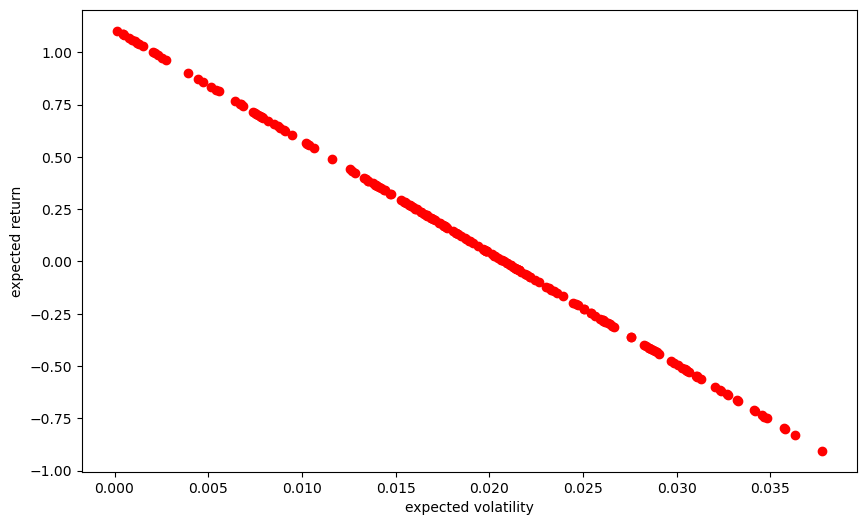

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [68]:
P = np.ones(3) / 3 

In [70]:
P

array([0.33333333, 0.33333333, 0.33333333])

In [71]:
S1 = np.array((20, 10, 5))

In [72]:
T0 = 10
T1 = np.array((1, 12, 13))

In [73]:
M0 = np.array((S0, T0))
M0


array([195.74,  10.  ])

In [74]:
 M1 = np.array((S1, T1)).T

In [75]:
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [76]:
rM = M1 / M0 - 1
rM

array([[-0.89782364, -0.9       ],
       [-0.94891182,  0.2       ],
       [-0.97445591,  0.3       ]])

In [77]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                 for phi in phi_mcs])


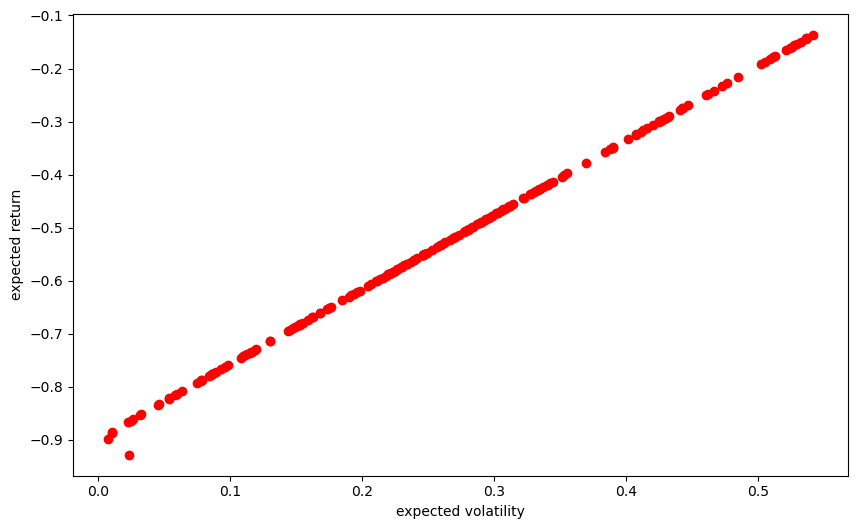

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');


# Minimum volatility and maximum Sharpe ratio

In [79]:
cons = {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1}

In [80]:
bnds = ((0, 1), (0, 1))


In [81]:
min_var = minimize(sigma_phi, (0.5, 0.5),
                   constraints=cons, bounds=bnds)

In [82]:
min_var

     fun: 0.007701133241917548
     jac: array([0.00762987, 0.00895386])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.94615926, 0.05384074])

In [84]:
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [85]:
 max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5, 0.5),constraints=cons, bounds=bnds) 

In [86]:
max_sharpe

     fun: 0.24525573579398635
     jac: array([ 1.7436791, -0.       ])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0., 1.])

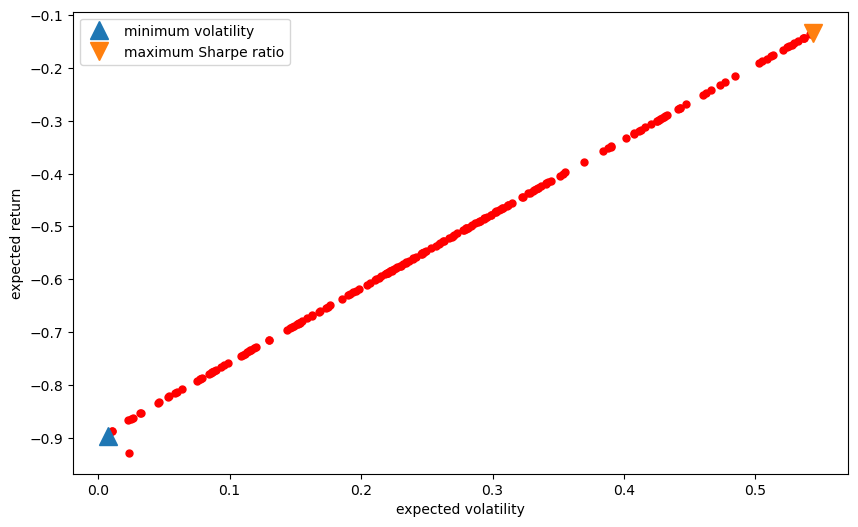

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),'^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();


# Efficient frontier

In [88]:
cons = [{'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1},{'type': 'eq', 'fun': lambda phi: mu_phi(phi) - target}]

In [89]:
bnds = ((0, 1), (0, 1))


In [90]:
targets = np.linspace(mu_phi(min_var['x']), 0.16)

In [91]:
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (0.5, 0.5),
                       constraints=cons, bounds=bnds)['x'] 
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

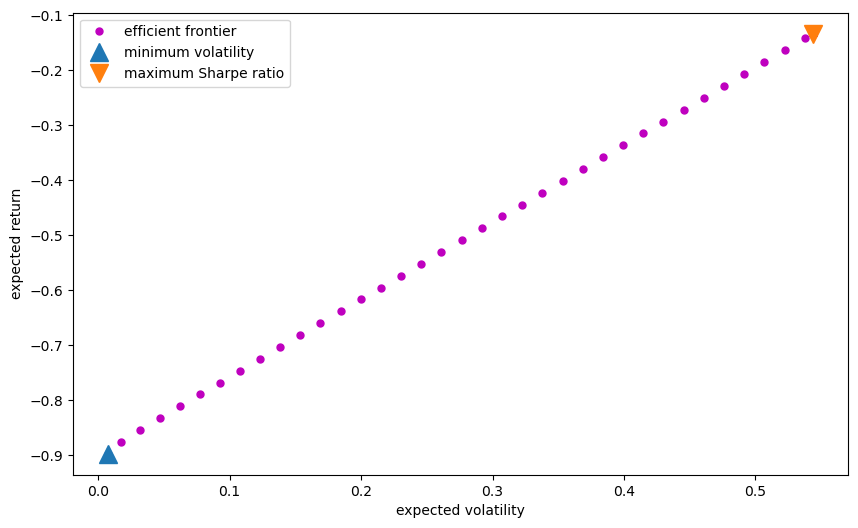

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5,label='efficient frontier')
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),'^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

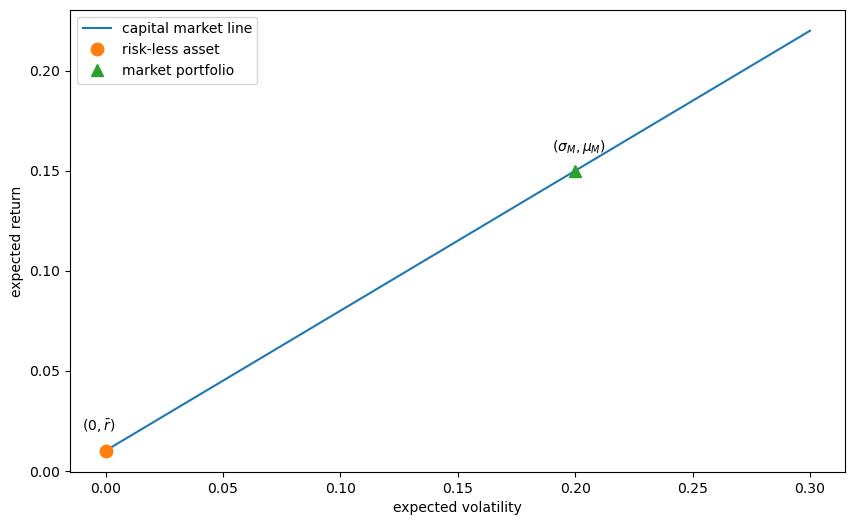

In [93]:
plt.figure(figsize=(10, 6))
plt.plot((0, 0.3), (0.01, 0.22), label='capital market line')
plt.plot(0, 0.01, 'o', ms=9, label='risk-less asset')
plt.plot(0.2, 0.15, '^', ms=9, label='market portfolio')
plt.annotate('$(0, \\bar{r})$', (0, 0.01), (-0.01, 0.02))
plt.annotate('$(\sigma_M, \mu_M)$', (0.2, 0.15), (0.19, 0.16))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();


# Capital market line

In [94]:
phi_M = np.array((0.8, 0.2))

In [95]:
mu_M = mu_phi(phi_M)


In [96]:
mu_M

-0.7789843670174721

In [97]:
sigma_M = sigma_phi(phi_M)

In [98]:
sigma_M

0.08434002882142676

In [99]:
r = 0.0025


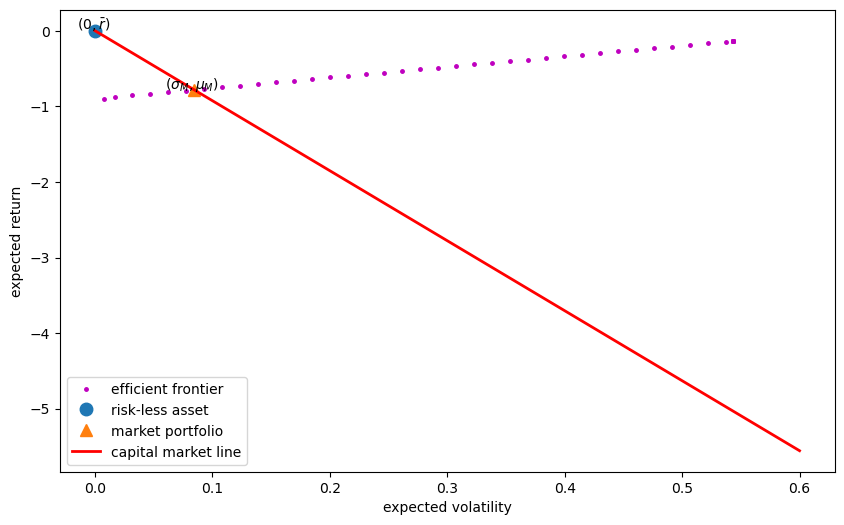

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'm.', ms=5,label='efficient frontier')
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot((0, 0.6), (r, r + ((mu_M - r) / sigma_M) * 0.6),'r', label='capital market line', lw=2.0)
plt.annotate('$(0, \\bar{r})$', (0, r), (-0.015, r + 0.01))
plt.annotate('$(\sigma_M, \mu_M)$', (sigma_M, mu_M),(sigma_M - 0.025, mu_M + 0.01))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();